# AtlasApprox Diseases API Tutorial

## Introduction

Welcome to the AtlasApprox Diseases API tutorial. This tutorial will guide you through the installation and basic usage of the `atlasapprox_diseases` package.


## Installation

To use the atlasapprox_diseases package, you need to have `pandas` and `requests` version 2.32.1 installed. You can install these dependencies using pip:

To install the `atlasapprox_diseases` package, use `pip`. Please note that this is a test version available on Test PyPI. Ensure that you are using Python version 3.11 or above.

```bash
pip install -i https://test.pypi.org/simple/ atlasapprox-diseases


In [5]:
pip install -i https://test.pypi.org/simple/ atlasapprox-diseases

Looking in indexes: https://test.pypi.org/simple/
  Using cached https://test-files.pythonhosted.org/packages/67/e9/fed6747cd0f8618edc15a118bbed9802dacca38cc301f0dba437e74e303f/atlasapprox_diseases-0.1.13-py3-none-any.whl (3.3 kB)
Note: you may need to restart the kernel to use updated packages.



## Quick Start


### Start the API

First, import the `API` class from the `atlasapprox_diseases` package and create an instance of the `API`:


In [6]:
from atlasapprox_diseases import API

# Initialize the API
api = API()


### Example 1: Differential cell type abundance (using disease keyword)


Differential cell type abundance analysis helps identify how the proportions of different cell types change between normal and disease conditions.

Let's fetch differential cell type abundance for a specific disease keyword. For example, **"covid"**


In [7]:
df_celltype_abundance = api.diff_celltype_abundance(disease_keyword="covid")


#### Output

Each row in the result represents a specific combination of disease, dataset, and cell type, showing how the abundance of that cell type differs between the disease and normal conditions. The delta_fraction column specifically highlights the change in proportion of that cell type between the two conditions.

In [8]:
# Display the the result as pandas dataframeb

df_celltype_abundance


,disease,dataset_title,cell_type,comparison,condition,condition_baseline,normal_count,disease_count,normal_total_count,disease_total_count,normal_fraction,disease_fraction,delta_fraction
0,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,hematopoietic stem cell,disease vs. normal,disease,normal,104,220,15765,25540,0.006597,0.008614,0.002017
1,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,erythrocyte,disease vs. normal,disease,normal,178,1259,15765,25540,0.011291,0.049295,0.038004
2,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,platelet,disease vs. normal,disease,normal,63,464,15765,25540,0.003996,0.018168,0.014171
3,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,lymphocyte,disease vs. normal,disease,normal,146,570,15765,25540,0.009261,0.022318,0.013057
4,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,natural killer cell,disease vs. normal,disease,normal,4558,2040,15765,25540,0.289121,0.079875,-0.209247
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,IgG memory B cell,disease vs. normal,disease,normal,607,1308,17590,31463,0.034508,0.041573,0.007064
58,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,"effector CD4-positive, alpha-beta T cell",disease vs. normal,disease,normal,1321,1813,17590,31463,0.075099,0.057623,-0.017476
59,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,"effector CD8-positive, alpha-beta T cell",disease vs. normal,disease,normal,1067,1875,17590,31463,0.060659,0.059594,-0.001066
60,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,IgG-negative class switched memory B cell,disease vs. normal,disease,normal,1285,2738,17590,31463,0.073053,0.087023,0.013970


#### Sorting cell types by abundance change (delta fraction)

You can also sort the DataFrame by **delta_fraction** in descending order to view the cell types that show the greatest increase in abundance in the disease condition compared to the normal condition

In [9]:
df_sorted_descending = df_celltype_abundance.sort_values(by='delta_fraction', ascending=False)

df_sorted_descending

,disease,dataset_title,cell_type,comparison,condition,condition_baseline,normal_count,disease_count,normal_total_count,disease_total_count,normal_fraction,disease_fraction,delta_fraction
12,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,classical monocyte,disease vs. normal,disease,normal,1669,6921,15765,25540,0.105867,0.270987,0.165119
50,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,platelet,disease vs. normal,disease,normal,253,3281,17590,31463,0.014383,0.104281,0.089898
29,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,neutrophil,disease vs. normal,disease,normal,0,1891,45787,45170,0.000000,0.041864,0.041864
20,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,IgG plasmablast,disease vs. normal,disease,normal,20,1087,15765,25540,0.001269,0.042561,0.041292
23,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,"activated CD4-positive, alpha-beta T cell, human",disease vs. normal,disease,normal,17,1022,15765,25540,0.001078,0.040016,0.038937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,non-classical monocyte,disease vs. normal,disease,normal,2547,1032,45787,45170,0.055627,0.022847,-0.032780
17,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,"effector memory CD8-positive, alpha-beta T cell",disease vs. normal,disease,normal,2651,2727,15765,25540,0.168157,0.106774,-0.061384
53,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,natural killer cell,disease vs. normal,disease,normal,3915,4005,17590,31463,0.222570,0.127292,-0.095277
36,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,classical monocyte,disease vs. normal,disease,normal,16158,10554,45787,45170,0.352895,0.233651,-0.119244


#### Visualizing the data

To better understand the changes in cell type abundance, you can create visualizations. Here's how you can use the data to create bar plots showing the differential cell type abundance for each dataset using matplotlib:

In [10]:
import matplotlib.pyplot as plt


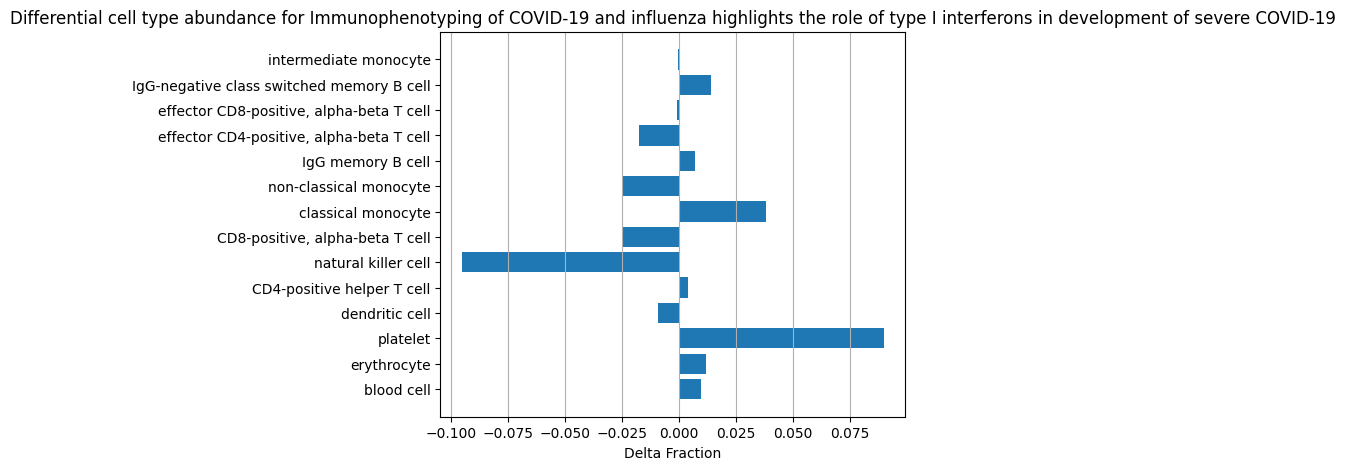

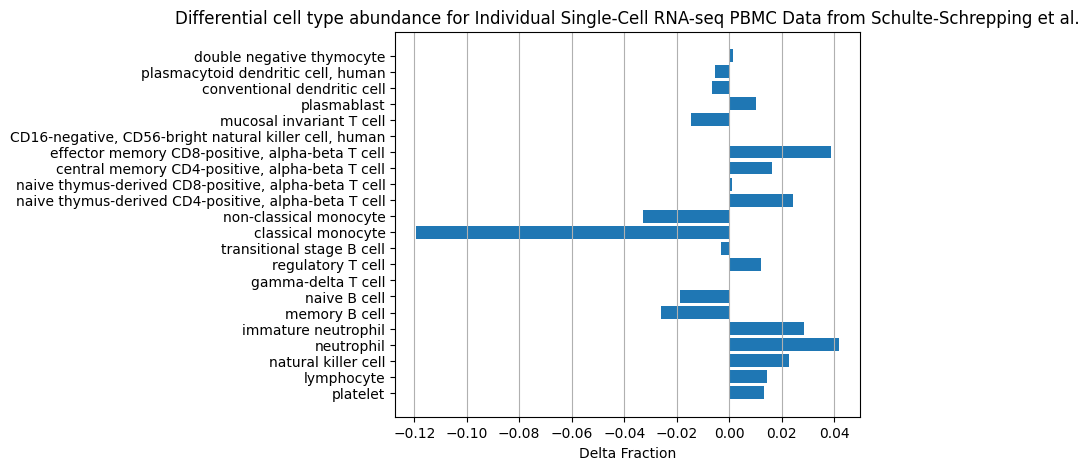

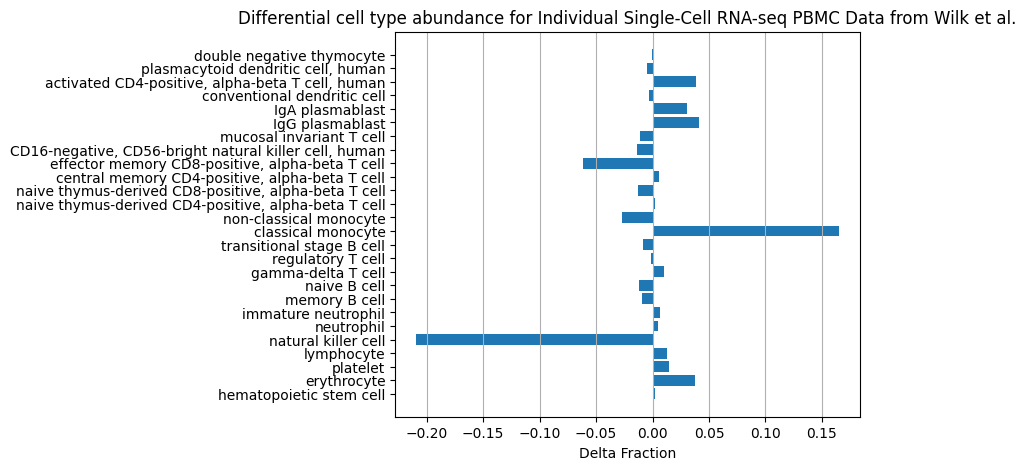

In [11]:
# Function to plot differential cell type abundance for each dataset
def plot_diff_celltype_abundance(df):
    # Group by dataset_title
    grouped = df.groupby('dataset_title')
    
    for dataset_title, group in grouped:
        plt.figure(figsize=(6, 5))
        plt.barh(group['cell_type'], group['delta_fraction'])
        plt.xlabel('Delta Fraction')
        plt.title(f'Differential cell type abundance for {dataset_title}')
        plt.grid(axis='x')
        plt.show()

# Plot the differential cell type abundance
plot_diff_celltype_abundance(df_celltype_abundance)

### Example 2.1: Differential gene expression for all cell types (using disease keyword)

In this example, we will fetch differential gene expression data for a specific disease keyword and the top 5 upregulated and downregulated genes for all available cell types.


#### Step 1: Fetch Differential Gene Expression Data

We use the diff_gene_expression method from the API to retrieve the data. This method requires two parameters: 1) the disease keyword, and 2) the number of top genes to display.

In [12]:
df_gene_expression_all = api.diff_gene_expression(
    disease_keyword="covid",
    top_n=5
)

#### Output

The resulting DataFrame (df_gene_expression) contains the top 5 (up & down) differentially expressed genes for across all available cell types in all available `covid` related datasets. Each row in the DataFrame represents a differentially expressed gene, providing detailed information on its expression changes between the disease and normal conditions.

In [13]:
df_gene_expression_all

,disease,dataset_title,cell_type,comparison,condition,condition_baseline,regulation,feature_name,unit,normal_expr,disease_expr,log_transformed,log2_fc,normal_fraction,disease_fraction,delta_fraction
0,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,hematopoietic stem cell,disease vs. normal,disease,normal,up,ENSG00000132530,cptt,1.412743,4.954321,False,1.303262,0.153846,0.504545,0.350699
1,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,hematopoietic stem cell,disease vs. normal,disease,normal,up,ENSG00000137959,cptt,0.000000,2.765172,False,1.912716,0.000000,0.290909,0.290909
2,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,hematopoietic stem cell,disease vs. normal,disease,normal,up,ENSG00000142089,cptt,0.437597,3.138294,False,1.525376,0.048077,0.336364,0.288287
3,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,hematopoietic stem cell,disease vs. normal,disease,normal,up,ENSG00000157601,cptt,0.726632,3.308897,False,1.319358,0.076923,0.345455,0.268531
4,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,hematopoietic stem cell,disease vs. normal,disease,normal,up,ENSG00000105810,cptt,4.452785,7.156817,False,0.581013,0.432692,0.681818,0.249126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,intermediate monocyte,disease vs. normal,disease,normal,down,ENSG00000229807,cptt,3.813986,1.847296,False,-0.757640,0.696517,0.447368,-0.249149
596,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,intermediate monocyte,disease vs. normal,disease,normal,down,ENSG00000115523,cptt,16.335957,10.319922,False,-0.614903,0.736318,0.500000,-0.236318
597,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,intermediate monocyte,disease vs. normal,disease,normal,down,ENSG00000211829,cptt,1.124900,0.345459,False,-0.659297,0.407960,0.178363,-0.229598
598,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,intermediate monocyte,disease vs. normal,disease,normal,down,ENSG00000203747,cptt,1.783551,0.729117,False,-0.686891,0.592040,0.365497,-0.226543


### Example 2.2: Differential gene expression for a specfic cell type (using disease keyword)

In this example, we will fetch differential gene expression data for a specific disease keyword, cell type, and the top 5 upregulated and downregulated genes.

#### Step 1: Fetch Differential Gene Expression Data

We use the diff_gene_expression method from the API to retrieve the data. This method requires the disease keyword, the cell type of interest, and the number of top genes to display.

In [15]:
df_gene_expression_cell_type_specific = api.diff_gene_expression(
    disease_keyword="covid",
    cell_type_keyword="T cell",
    top_n=5
)

#### Output

The resulting DataFrame (df_gene_expression) contains the top differentially expressed genes for cell types that contain the keyword `T cell` in all available `covid` related datasets. Each row in the DataFrame represents a differentially expressed gene, providing detailed information on its expression changes between the disease and normal conditions.



In [16]:
df_gene_expression_cell_type_specific


,disease,dataset_title,cell_type,comparison,condition,condition_baseline,regulation,feature_name,unit,normal_expr,disease_expr,log_transformed,log2_fc,normal_fraction,disease_fraction,delta_fraction
0,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,gamma-delta T cell,disease vs. normal,disease,normal,up,ENSG00000036448,cptt,0.301473,6.489651,False,2.524753,0.030151,0.654514,0.624363
1,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,gamma-delta T cell,disease vs. normal,disease,normal,up,ENSG00000168329,cptt,2.552426,6.476168,False,1.073494,0.276382,0.644097,0.367715
2,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,gamma-delta T cell,disease vs. normal,disease,normal,up,ENSG00000100453,cptt,3.172268,6.708242,False,0.885570,0.331658,0.664931,0.333272
3,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,gamma-delta T cell,disease vs. normal,disease,normal,up,ENSG00000203747,cptt,3.855826,6.841932,False,0.691492,0.396985,0.675347,0.278362
4,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,gamma-delta T cell,disease vs. normal,disease,normal,up,ENSG00000132530,cptt,2.850255,5.848413,False,0.830816,0.306533,0.578125,0.271592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,"effector CD8-positive, alpha-beta T cell",disease vs. normal,disease,normal,down,ENSG00000134539,cptt,2.013945,1.219684,False,-0.441298,0.500469,0.291200,-0.209269
186,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,"effector CD8-positive, alpha-beta T cell",disease vs. normal,disease,normal,down,ENSG00000110046,cptt,2.271817,1.442214,False,-0.421903,0.667291,0.458667,-0.208625
187,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,"effector CD8-positive, alpha-beta T cell",disease vs. normal,disease,normal,down,ENSG00000139187,cptt,1.726592,0.936356,False,-0.493754,0.538894,0.332800,-0.206094
188,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,"effector CD8-positive, alpha-beta T cell",disease vs. normal,disease,normal,down,ENSG00000179344,cptt,1.845590,0.826244,False,-0.639848,0.481724,0.280000,-0.201724


### Example 3: Fetch Metadata

For advanced users, we also provide a way to fetch metadata for further analysis and filtering.

Let's fetch metadata for a specific disease keyword. For example, **"covid"**:

In [17]:
# Fetch metadata for "covid", or replace it with any disease keyword

df_metadata = api.get_metadata(disease_keyword="covid")


#### Sample Metadata Output

In [18]:
df_metadata

,unique_id,disease,cell_type_number,dataset_id,collection_name,unit,log_transformed,has_normal_baseline
0,6c9402a9-13cd-55a4-daf5-ad6002360886,COVID-19,26,055ca631-6ffb-40de-815e-b931e10718c0,A Web Portal and Workbench for Biological Diss...,cptt,False,True
1,2d592d70-812d-7652-77d6-59e4bdb2223c,COVID-19,14,de2c780c-1747-40bd-9ccf-9588ec186cee,Immunophenotyping of COVID-19 and influenza hi...,cptt,False,True
2,ef3a1496-0ccd-14c6-49e8-5e2159d304a5,COVID-19,22,5e717147-0f75-4de1-8bd2-6fda01b8d75f,A Web Portal and Workbench for Biological Diss...,cptt,False,True


#### Understanding the metadata

Each row in the `get_metadata` result represents a unique combination of disease and the dataset. The attributes stored in the metadata provide detailed information about each dataset:

1. **unique_id**: A unique identifier for each combination of disease and dataset.
2. **disease**: The disease associated with the dataset.
3. **cell_type_number**: The number of distinct cell types present in this dataset.
4. **dataset_id**: A unique identifier for the dataset file.
5. **collection_name**: The name of the collection or study the dataset belongs to.
6. **unit**: The unit of measurement for the gene expression data (e.g., 'cptt', 'cpm', 'raw').
7. **log_transformed**: Indicates whether the gene expression data has been log-transformed.
8. **has_normal_baseline**: Indicates whether the dataset includes a normal baseline for comparison.

#### Filtering Metadata (with 2 examples)

You can filter the metadata to extract specific information. Let's demonstrate how to filter rows based on certain criteria.

**Example 1:** if you want to get a list of all datasets related to COVID-19 with more than 20 cell types:


In [19]:
# Filter metadata for datasets related to COVID-19 with more than 20 cell types

filtered_metadata = df_metadata[(df_metadata['disease'] == 'COVID-19') & (df_metadata['cell_type_number'] > 20)]

# Display the filtered metadata
filtered_metadata

,unique_id,disease,cell_type_number,dataset_id,collection_name,unit,log_transformed,has_normal_baseline
0,6c9402a9-13cd-55a4-daf5-ad6002360886,COVID-19,26,055ca631-6ffb-40de-815e-b931e10718c0,A Web Portal and Workbench for Biological Diss...,cptt,False,True
2,ef3a1496-0ccd-14c6-49e8-5e2159d304a5,COVID-19,22,5e717147-0f75-4de1-8bd2-6fda01b8d75f,A Web Portal and Workbench for Biological Diss...,cptt,False,True



### Example 4: Use unique ids from the metadata result to inqurie differential data


### 4.1: Differential cell type abundance (using unique ids)

In [20]:
# Fetch differential cell type abundance using unique IDs (ids selected from the first example)

unique_ids = ["6c9402a9-13cd-55a4-daf5-ad6002360886", "ef3a1496-0ccd-14c6-49e8-5e2159d304a5"]
df_cell_abundance_by_ids = api.diff_celltype_abundance(unique_ids=unique_ids)


In [21]:
# Display the result as panda dataframe
df_cell_abundance_by_ids

,disease,dataset_title,cell_type,comparison,condition,condition_baseline,normal_count,disease_count,normal_total_count,disease_total_count,normal_fraction,disease_fraction,delta_fraction
0,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,hematopoietic stem cell,disease vs. normal,disease,normal,104,220,15765,25540,0.006597,0.008614,0.002017
1,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,erythrocyte,disease vs. normal,disease,normal,178,1259,15765,25540,0.011291,0.049295,0.038004
2,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,platelet,disease vs. normal,disease,normal,63,464,15765,25540,0.003996,0.018168,0.014171
3,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,lymphocyte,disease vs. normal,disease,normal,146,570,15765,25540,0.009261,0.022318,0.013057
4,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,natural killer cell,disease vs. normal,disease,normal,4558,2040,15765,25540,0.289121,0.079875,-0.209247
5,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,neutrophil,disease vs. normal,disease,normal,28,167,15765,25540,0.001776,0.006539,0.004763
6,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,immature neutrophil,disease vs. normal,disease,normal,2,175,15765,25540,0.000127,0.006852,0.006725
7,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,memory B cell,disease vs. normal,disease,normal,453,501,15765,25540,0.028735,0.019616,-0.009118
8,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,naive B cell,disease vs. normal,disease,normal,710,842,15765,25540,0.045036,0.032968,-0.012069
9,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,gamma-delta T cell,disease vs. normal,disease,normal,199,576,15765,25540,0.012623,0.022553,0.009930


### 4.2: Differential gene expression (using unique ids)

Fetch differential gene expression for specific unique IDs, cell type, and top N genes:

In [22]:
# Fetch differential gene expression using unique IDs
unique_ids = ["6c9402a9-13cd-55a4-daf5-ad6002360886", "2d592d70-812d-7652-77d6-59e4bdb2223c"]

df_gene_expression_by_ids = api.diff_gene_expression(
    unique_ids=unique_ids,
    cell_type_keyword="T cell",
    top_n=5
)

In [23]:
df_gene_expression_by_ids

,disease,dataset_title,cell_type,comparison,condition,condition_baseline,regulation,feature_name,unit,normal_expr,disease_expr,log_transformed,log2_fc,normal_fraction,disease_fraction,delta_fraction
0,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,gamma-delta T cell,disease vs. normal,disease,normal,up,ENSG00000036448,cptt,0.301473,6.489651,False,2.524753,0.030151,0.654514,0.624363
1,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,gamma-delta T cell,disease vs. normal,disease,normal,up,ENSG00000168329,cptt,2.552426,6.476168,False,1.073494,0.276382,0.644097,0.367715
2,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,gamma-delta T cell,disease vs. normal,disease,normal,up,ENSG00000100453,cptt,3.172268,6.708242,False,0.885570,0.331658,0.664931,0.333272
3,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,gamma-delta T cell,disease vs. normal,disease,normal,up,ENSG00000203747,cptt,3.855826,6.841932,False,0.691492,0.396985,0.675347,0.278362
4,COVID-19,Individual Single-Cell RNA-seq PBMC Data from ...,gamma-delta T cell,disease vs. normal,disease,normal,up,ENSG00000132530,cptt,2.850255,5.848413,False,0.830816,0.306533,0.578125,0.271592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,"effector CD8-positive, alpha-beta T cell",disease vs. normal,disease,normal,down,ENSG00000134539,cptt,2.013945,1.219684,False,-0.441298,0.500469,0.291200,-0.209269
116,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,"effector CD8-positive, alpha-beta T cell",disease vs. normal,disease,normal,down,ENSG00000110046,cptt,2.271817,1.442214,False,-0.421903,0.667291,0.458667,-0.208625
117,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,"effector CD8-positive, alpha-beta T cell",disease vs. normal,disease,normal,down,ENSG00000139187,cptt,1.726592,0.936356,False,-0.493754,0.538894,0.332800,-0.206094
118,COVID-19,Immunophenotyping of COVID-19 and influenza hi...,"effector CD8-positive, alpha-beta T cell",disease vs. normal,disease,normal,down,ENSG00000179344,cptt,1.845590,0.826244,False,-0.639848,0.481724,0.280000,-0.201724


## Conclusion

This tutorial provided a quick start guide to using the `atlasapprox_diseases` package. For more detailed information, refer to the official documentation.
